In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('../data/2014.csv', nrows=5000000)
# data = pd.read_csv('2014.csv', nrows=1000000, skiprows=range(1, 1000000))
# random sample 1000000 rows from the data
# data = pd.read_csv('2014.csv', skiprows=lambda i: i>0 and np.random.rand() > 0.01)


/tmp/ipykernel_21470/466893950.py:1: DtypeWarning: Columns (18,23,29,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('2014.csv', nrows=5000000)


In [3]:
# create summary of the data
summary = data.describe()
print(summary)

       Summons Number  Violation Code  Street Code1  Street Code2  \
count    5.000000e+06    5.000000e+06  5.000000e+06  5.000000e+06   
mean     6.430585e+09    3.473974e+01  2.734165e+04  2.308798e+04   
std      2.207071e+09    2.062452e+01  2.164400e+04  2.152245e+04   
min      1.001794e+09    0.000000e+00  0.000000e+00  0.000000e+00   
25%      7.038142e+09    2.000000e+01  1.054000e+04  8.440000e+03   
50%      7.335595e+09    3.700000e+01  2.274000e+04  1.775000e+04   
75%      7.736096e+09    4.500000e+01  3.642000e+04  3.527000e+04   
max      7.999973e+09    9.900000e+01  9.827000e+04  9.831000e+04   

       Street Code3  Vehicle Expiration Date  Violation Location  \
count  5.000000e+06             5.000000e+06        4.623083e+06   
mean   2.346462e+04             2.740679e+07        5.456178e+01   
std    2.165849e+04             2.566760e+07        3.858037e+01   
min    0.000000e+00             0.000000e+00        1.000000e+00   
25%    8.440000e+03             2.0131

In [4]:
# Corrected code for printing the percentage of missing values per column
print(f"{'column':<35}{'percentage of missing values':<20}")
for column in data.columns:
    missing_values = data[column].isnull().sum()
    print(f'{column:<35} {missing_values / len(data) * 100:.2f}%')

column                             percentage of missing values
Summons Number                      0.00%
Plate ID                            0.05%
Registration State                  0.00%
Plate Type                          0.00%
Issue Date                          0.00%
Violation Code                      0.00%
Vehicle Body Type                   1.52%
Vehicle Make                        0.74%
Issuing Agency                      0.00%
Street Code1                        0.00%
Street Code2                        0.00%
Street Code3                        0.00%
Vehicle Expiration Date             0.00%
Violation Location                  7.54%
Violation Precinct                  0.00%
Issuer Precinct                     0.00%
Issuer Code                         0.00%
Issuer Command                      7.35%
Issuer Squad                        7.35%
Violation Time                      0.03%
Time First Observed                 88.84%
Violation County                    7.95%
Violation I

In [5]:
cols_to_keep =['Registration State',
               'Plate Type',
               'Issue Date',
               'Violation Time',
               'Violation Location',
               'Violation Precinct', 
               'Issuer Precinct',
               'Issuer Code',
               'Violation Code',
               'Meter Number',
               'Violation County',
               'Issuer Squad',
               'Issuing Agency']
df = data[cols_to_keep]

In [6]:
precinct_loc_df = df[['Violation Location', 'Violation Precinct', 'Issuer Precinct']]
precinct_loc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Violation Location,4623083.0,54.561777,38.580367,1.0,18.0,49.0,90.0,994.0
Violation Precinct,5000000.0,50.448725,39.796218,0.0,17.0,44.0,84.0,994.0
Issuer Precinct,5000000.0,57.508432,69.373119,0.0,17.0,45.0,90.0,996.0


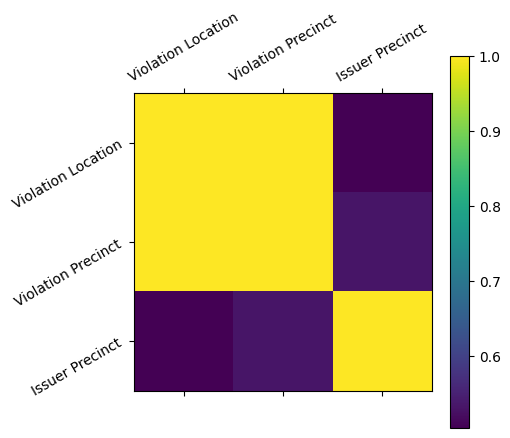

In [7]:
# correlation matrix
corr = precinct_loc_df.corr()
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=30)
plt.yticks(range(len(corr.columns)), corr.columns, rotation=30)
plt.colorbar()
plt.show()



In [8]:
# drop violation location column
df.drop('Violation Location', axis=1, inplace=True)

/tmp/ipykernel_21470/3756596193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Violation Location', axis=1, inplace=True)


In [9]:
# print all columns and their data types
print(df.dtypes)

Registration State    object
Plate Type            object
Issue Date            object
Violation Time        object
Violation Precinct     int64
Issuer Precinct        int64
Issuer Code            int64
Violation Code         int64
Meter Number          object
Violation County      object
Issuer Squad          object
Issuing Agency        object
dtype: object


In [10]:
df['Issue Date and Time'] = df['Issue Date'] + ' ' + df['Violation Time']
df['Issue Date and Time'] = df['Issue Date and Time'] + 'M'
df['Issue Date and Time'] = pd.to_datetime(df['Issue Date and Time'], format='%m/%d/%Y %I%M%p', errors='coerce')

/tmp/ipykernel_21470/1055603492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Issue Date and Time'] = df['Issue Date'] + ' ' + df['Violation Time']
/tmp/ipykernel_21470/1055603492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Issue Date and Time'] = df['Issue Date and Time'] + 'M'
/tmp/ipykernel_21470/1055603492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [11]:
# head
print(df.head())

  Registration State Plate Type  Issue Date Violation Time  \
0                 NY        PAS  12/18/1970          0358A   
1                 NY        COM  02/02/1971          1116A   
2                 NY        SRF  09/18/1971          0939A   
3                 TX        PAS  09/18/1971          0945A   
4                 NY        SRF  09/18/1971          0950A   

   Violation Precinct  Issuer Precinct  Issuer Code  Violation Code  \
0                  70                0       829379              20   
1                  68               68       928157              46   
2                 104                0       515350              21   
3                 104                0       515350              21   
4                 104                0       515350              21   

  Meter Number Violation County Issuer Squad Issuing Agency  \
0            -                K         0000              S   
1            -                K         0000              P   
2          

In [12]:
remap_county_dict = {
    'K' : 'Brooklyn',
    'Q' : 'Queens',
    'NY': 'Manhattan',
    'QN': 'Queens',
    'BK': 'Brooklyn',
    'R' : 'Staten Island',
    'BX': 'Bronx',
    'ST': 'Staten Island',
    'MN': 'Manhattan',
    'KINGS': 'Brooklyn',
    'QNS': 'Queens',
    'BRONX': 'Bronx'
}
df['Violation County'] = df['Violation County'].map(remap_county_dict).astype('category')
df.head(3)

/tmp/ipykernel_21470/1355472466.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Violation County'] = df['Violation County'].map(remap_county_dict).astype('category')


,Registration State,Plate Type,Issue Date,Violation Time,Violation Precinct,Issuer Precinct,Issuer Code,Violation Code,Meter Number,Violation County,Issuer Squad,Issuing Agency,Issue Date and Time
0,NY,PAS,12/18/1970,0358A,70,0,829379,20,-,Brooklyn,0000,S,1970-12-18 03:58:00
1,NY,COM,02/02/1971,1116A,68,68,928157,46,-,Brooklyn,0000,P,1971-02-02 11:16:00
2,NY,SRF,09/18/1971,0939A,104,0,515350,21,-,NaN,0000,S,1971-09-18 09:39:00


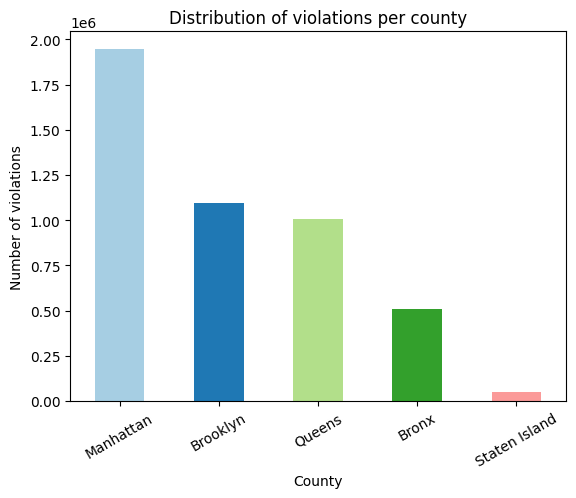

In [13]:
# plot distribution of violations per county
df['Violation County'].value_counts().plot(kind='bar', color=plt.cm.Paired(range(len(df['Violation County'].unique()))))
plt.title('Distribution of violations per county')
plt.xlabel('County')
plt.ylabel('Number of violations')
plt.xticks(rotation=30)
plt.show()

In [14]:
# plot distribution of violations per month
df['Issue Date and Time'] = pd.to_datetime(df['Issue Date and Time'])

# Create a new column for the month name
df['Month Name'] = df['Issue Date and Time'].dt.strftime('%B-%Y')

# Order the months correctly since the original approach might not automatically do this
ordered_months = ['July-2013', 'August-2013', 'September-2013', 'October-2013', 'November-2013', 'December-2013', 'January-2014', 'February-2014', 'March-2014', 'April-2014', 'May-2014', 'June-2014']

# Count violations per month and reindex to ensure the months are in the correct order
monthly_violations = df['Month Name'].value_counts().reindex(ordered_months, fill_value=0)


/tmp/ipykernel_21470/1540497860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Issue Date and Time'] = pd.to_datetime(df['Issue Date and Time'])
/tmp/ipykernel_21470/1540497860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month Name'] = df['Issue Date and Time'].dt.strftime('%B-%Y')


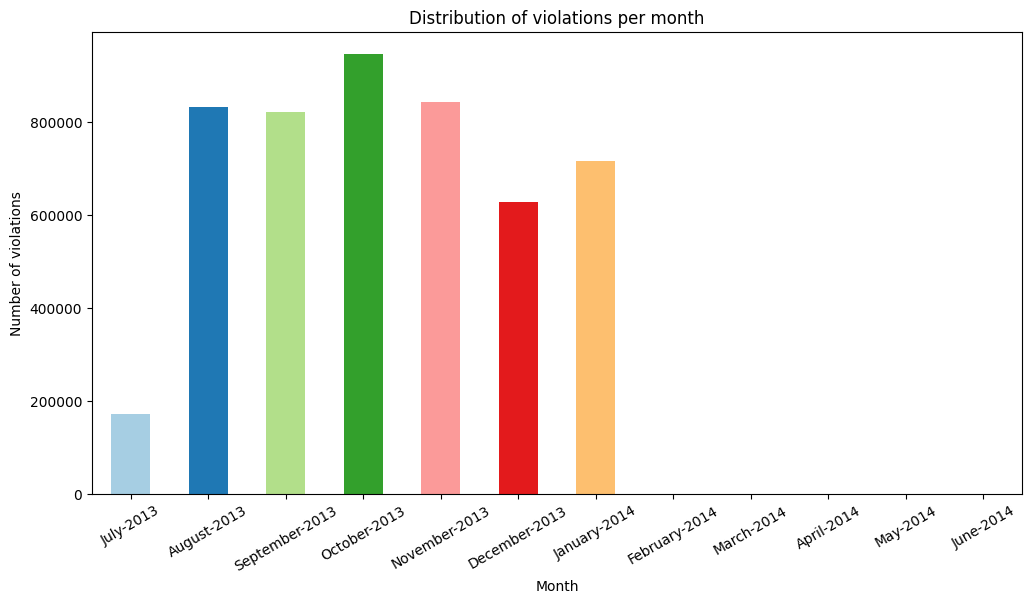

In [15]:
# Plot
plt.figure(figsize=(12, 6))
monthly_violations.plot(kind='bar', color=plt.cm.Paired(range(len(ordered_months))))
plt.title('Distribution of violations per month')
plt.xlabel('Month')
plt.xticks(rotation=30)  # Rotate x labels for better readability
plt.ylabel('Number of violations')
plt.show()